In [1]:
import pandas as pd
import numpy as np

data = r"D:\Desktop\PROGRAMMING\Python\Datasets\students_placement.csv"
df = pd.read_csv(data)
df.sample(3)

,cgpa,iq,profile_score,placed
297,7.68,101,70,1
115,7.30,101,50,1
248,5.94,101,38,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cgpa           300 non-null    float64
 1   iq             300 non-null    int64  
 2   profile_score  300 non-null    int64  
 3   placed         300 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


In [3]:
df['placed'].value_counts()

1    152
0    148
Name: placed, dtype: int64

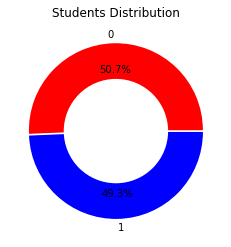

In [4]:
import matplotlib.pyplot as plt
'''df['placed'].value_counts().plot(kind='bar')
plt.title('Value Counts for Placed Col.')
plt.show()'''

clrs = ['#FF0000','#0000FF']
lbls = [0,1]
expld = (0.01,0.01)

plt.pie(df['placed'].value_counts(),colors = clrs,labels = lbls,autopct = '%1.1f%%',pctdistance = 0.70,explode = expld)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
 
plt.title('Students Distribution')
plt.show()

Hence, data is balanced and cleaned as it doesn't contain any null or duplicated values we'll split the data in train and test set to bulid the model

In [5]:
from sklearn.model_selection import train_test_split

# select independent variables
X = df.drop(columns='placed')

# select dependent variables
y = df.loc[:, 'placed']

print(X.columns)
print(y.name)

Index(['cgpa', 'iq', 'profile_score'], dtype='object')
placed


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=28, test_size = 0.2)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.85


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8833333333333333


In [10]:
'''import pickle 
pickle.dump(lr,open('model1.pkl','wb'))'''

"import pickle \npickle.dump(lr,open('model1.pkl','wb'))"